In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [155]:
df = pd.read_csv("/content/drive/MyDrive/DATA SETS/Loan_Data.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [156]:
df.shape

(614, 13)

In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [158]:
# drop the non related columns
df = df.drop(columns=['Loan_ID'])

In [159]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


# Exploratory Data Analysis

In [160]:
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

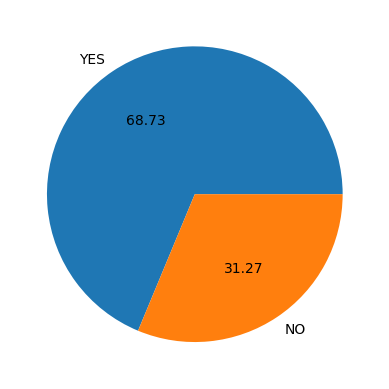

In [161]:
plt.pie(df['Loan_Status'].value_counts(), labels=['YES','NO'],autopct="%0.2f")
plt.show()

In [162]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

<ipython-input-163-6d9019a74187>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


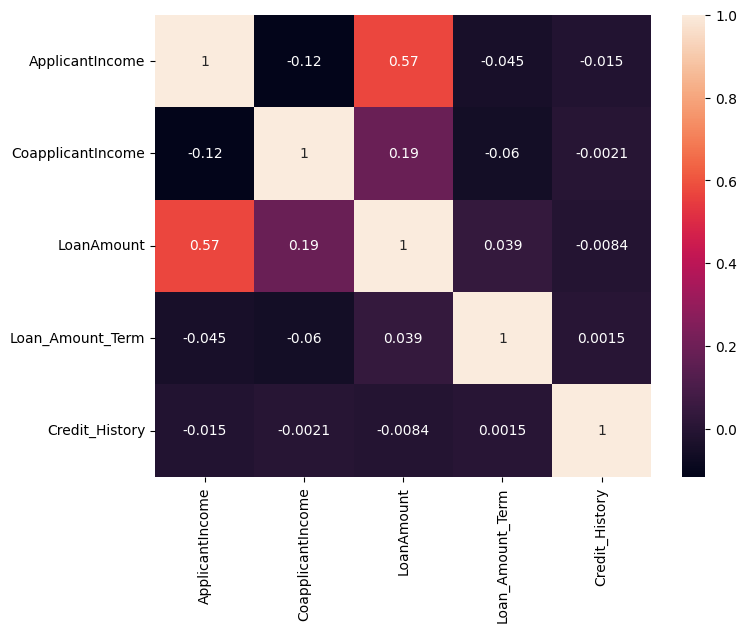

In [163]:
sns.heatmap(df.corr(),annot=True)
fig=plt.gcf()
fig.set_size_inches(8,6)
plt.show()

## Data Cleaning and Preprocessing

In [ ]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean(), inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

In [ ]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
## Handling categorical variables

df.Loan_Status = df.Loan_Status.replace({"Y":1 , "N":0})
df.Married = df.Married.replace({"Yes":1 , "No":0})
df.Self_Employed = df.Self_Employed.replace({"Yes":1 , "No":0})
df.Gender = df.Gender.replace({"Male":1 , "Female":0})

In [ ]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,Graduate,0,5849,0.0,146.412162,360.0,1.0,Urban,1
1,1,1,1,Graduate,0,4583,1508.0,128.000000,360.0,1.0,Rural,0
2,1,1,0,Graduate,1,3000,0.0,66.000000,360.0,1.0,Urban,1
3,1,1,0,Not Graduate,0,2583,2358.0,120.000000,360.0,1.0,Urban,1
4,1,0,0,Graduate,0,6000,0.0,141.000000,360.0,1.0,Urban,1


In [ ]:
from sklearn.preprocessing import LabelEncoder
feature_col = ["Education" , "Dependents" , "Property_Area"]
le = LabelEncoder()
for col in feature_col:
 df[col] = le.fit_transform(df[col])

In [ ]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


In [ ]:
X = df.drop('Loan_Status', axis = 1)
X = X.values

Y=df[["Loan_Status"]]

In [252]:
from sklearn.model_selection import train_test_split
X_TRAIN,X_TEST,Y_TRAIN,Y_TEST=train_test_split(X,Y,test_size=0.02,random_state=1)

In [248]:
X_TRAIN.shape , X_TEST.shape , Y_TRAIN.shape , Y_TEST.shape

((607, 11), (7, 11), (607, 1), (7, 1))

# MODEL BUILDING

# Decision Tree

In [244]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,precision_score,recall_score
dt=DecisionTreeClassifier()
dt.fit(X_TRAIN,Y_TRAIN)


DecisionTreeClassifier()

In [254]:
Y_pred_dt = dt.predict(X_TEST)

In [255]:
accuracy_dt= accuracy_score(Y_pred_dt,Y_TEST)
print(accuracy_dt)

0.8461538461538461


In [256]:
print("Precision : ", precision_score(Y_TEST, Y_pred_dt))
print("Recall : ", recall_score(Y_TEST, Y_pred_dt))
print("F1 Score : ", f1_score(Y_TEST, Y_pred_dt))
print("\n")
cm1=confusion_matrix(Y_pred_dt,Y_TEST)
cm1

Precision :  0.8888888888888888
Recall :  0.8888888888888888
F1 Score :  0.8888888888888888




array([[3, 1],
       [1, 8]])

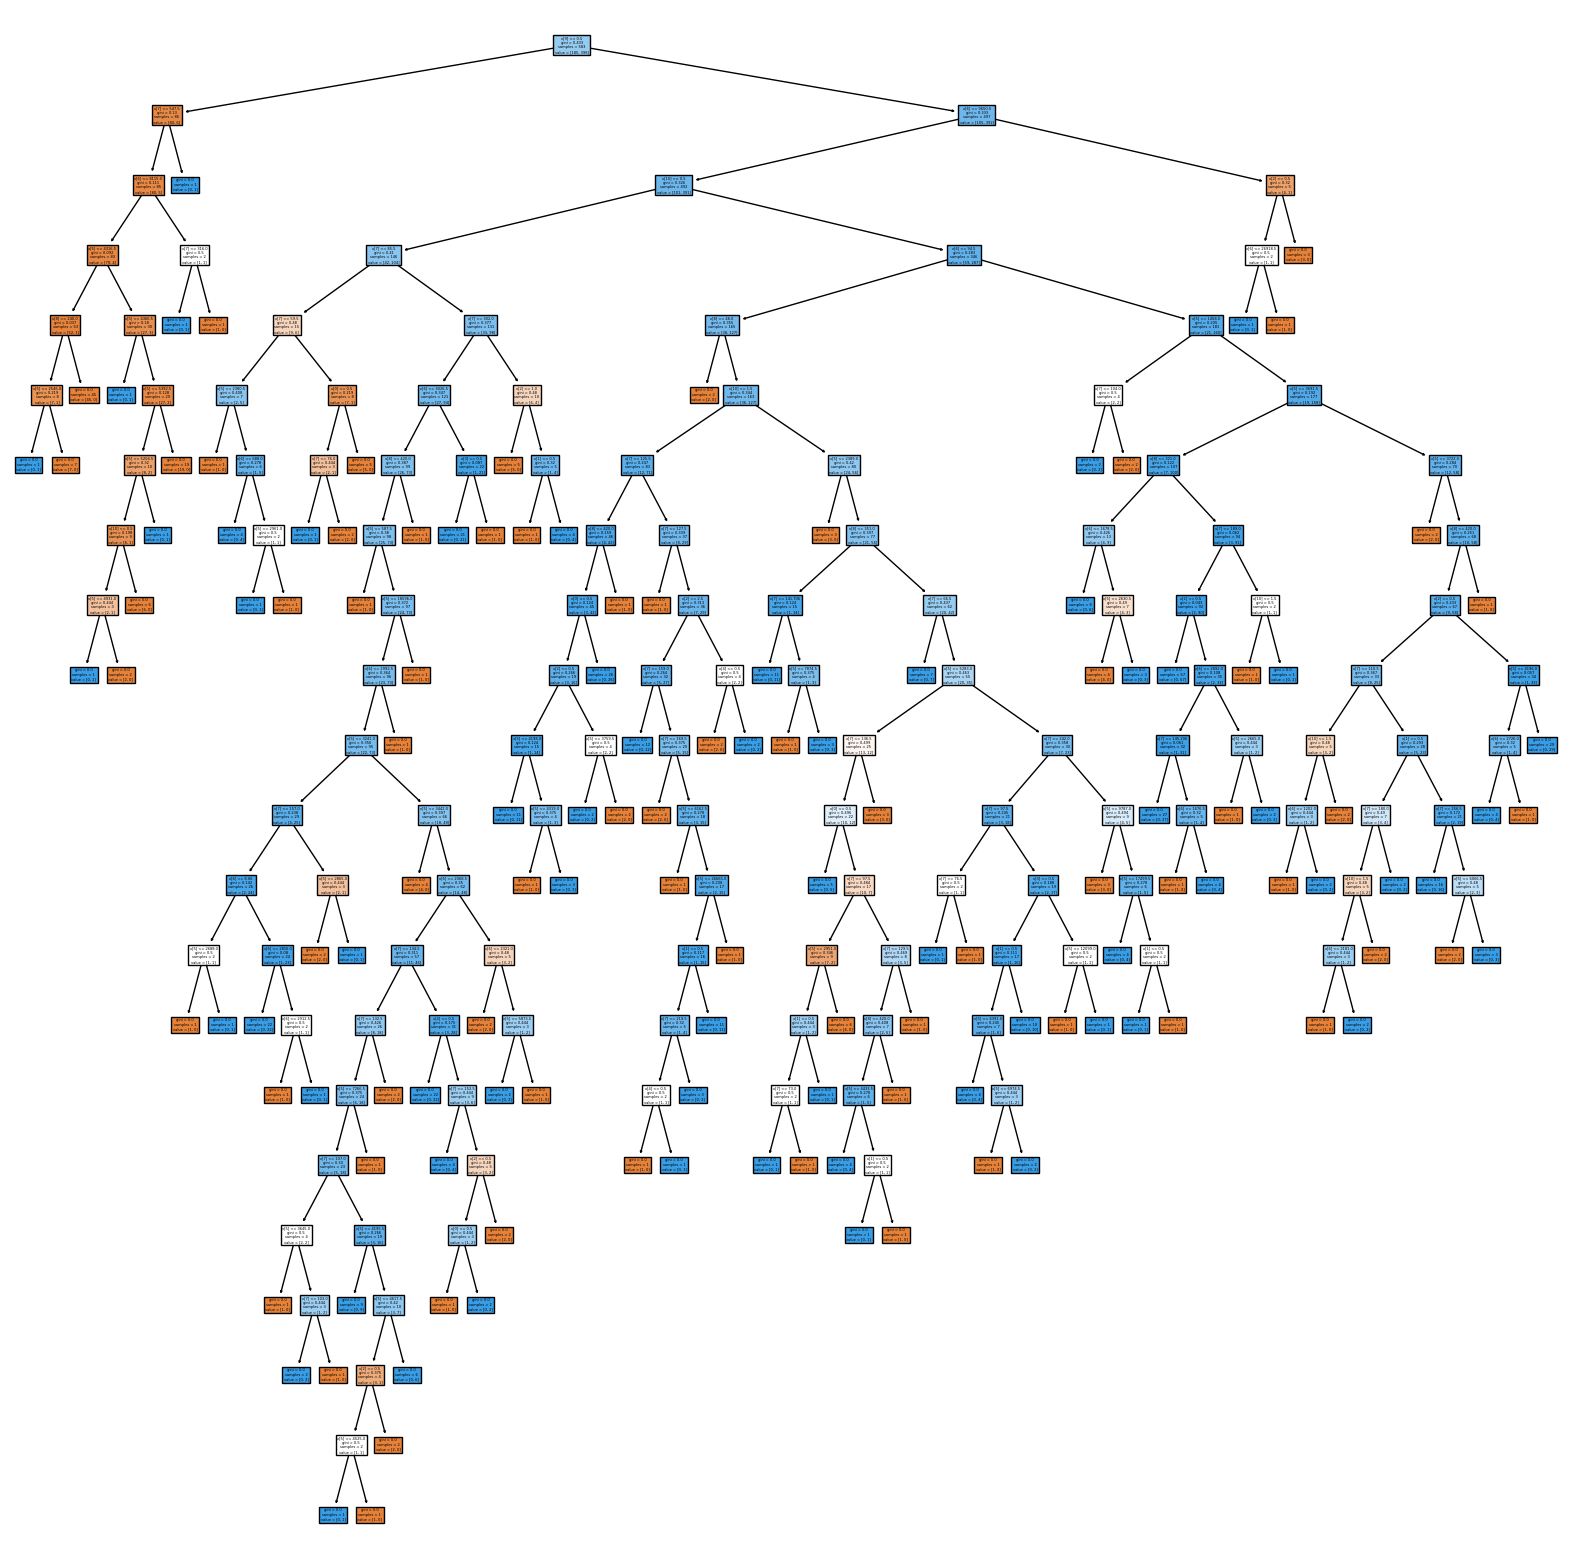

In [230]:
from sklearn import tree
from sklearn.tree import plot_tree
plt.figure(figsize = (20,20))
tree.plot_tree(dt,filled = True)
plt.show()

# KNN

In [231]:
from sklearn.neighbors import KNeighborsClassifier

In [263]:
knn=KNeighborsClassifier(metric='manhattan', n_neighbors=150)
knn.fit(X_TRAIN,Y_TRAIN)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(metric='manhattan', n_neighbors=150)

In [264]:
Y_pred_knn = knn.predict(X_TEST)

In [265]:
accuracy_knn= accuracy_score(Y_pred_knn,Y_TEST)
print(accuracy_knn)

0.6923076923076923


In [266]:
print("Precision : ", precision_score(Y_TEST, Y_pred_knn))
print("Recall : ", recall_score(Y_TEST, Y_pred_knn))
print("F1 Score : ", f1_score(Y_TEST, Y_pred_knn))
print("\n")
cm2=confusion_matrix(Y_pred_knn,Y_TEST)
cm2

Precision :  0.6923076923076923
Recall :  1.0
F1 Score :  0.8181818181818181




array([[0, 0],
       [4, 9]])

# Naive Bayes

In [236]:
from sklearn.naive_bayes import GaussianNB

In [237]:
nb = GaussianNB()
nb.fit(X_TRAIN , Y_TRAIN)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [267]:
Y_pred_nb = nb.predict(X_TEST)

In [268]:
accuracy_nb= accuracy_score(Y_pred_nb,Y_TEST)
print(accuracy_nb)

0.6923076923076923


In [269]:
print("Precision : ", precision_score(Y_TEST, Y_pred_nb))
print("Recall : ", recall_score(Y_TEST, Y_pred_nb))
print("F1 Score : ", f1_score(Y_TEST, Y_pred_nb))
print("\n")

cm3=confusion_matrix(Y_pred_nb,Y_TEST)
cm3

Precision :  0.7777777777777778
Recall :  0.7777777777777778
F1 Score :  0.7777777777777778




array([[2, 2],
       [2, 7]])

# Random Forest

In [270]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [271]:
rf = RandomForestClassifier(n_estimators=50,criterion='entropy',random_state=1)

In [272]:
rf.fit(X_TRAIN ,Y_TRAIN)

<ipython-input-272-7407a50586eb>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_TRAIN ,Y_TRAIN)


RandomForestClassifier(criterion='entropy', n_estimators=50, random_state=1)

In [273]:
Y_pred_rf = rf.predict(X_TEST)

In [274]:
accuracy_rf= accuracy_score(Y_pred_rf,Y_TEST)
print(accuracy_rf)

0.8461538461538461


In [275]:
print("Precision : ", precision_score(Y_TEST, Y_pred_rf))
print("Recall : ", recall_score(Y_TEST, Y_pred_rf))
print("F1 Score : ", f1_score(Y_TEST, Y_pred_rf))
print("\n")

cm4=confusion_matrix(Y_pred_rf,Y_TEST)
cm4

Precision :  0.8888888888888888
Recall :  0.8888888888888888
F1 Score :  0.8888888888888888




array([[3, 1],
       [1, 8]])

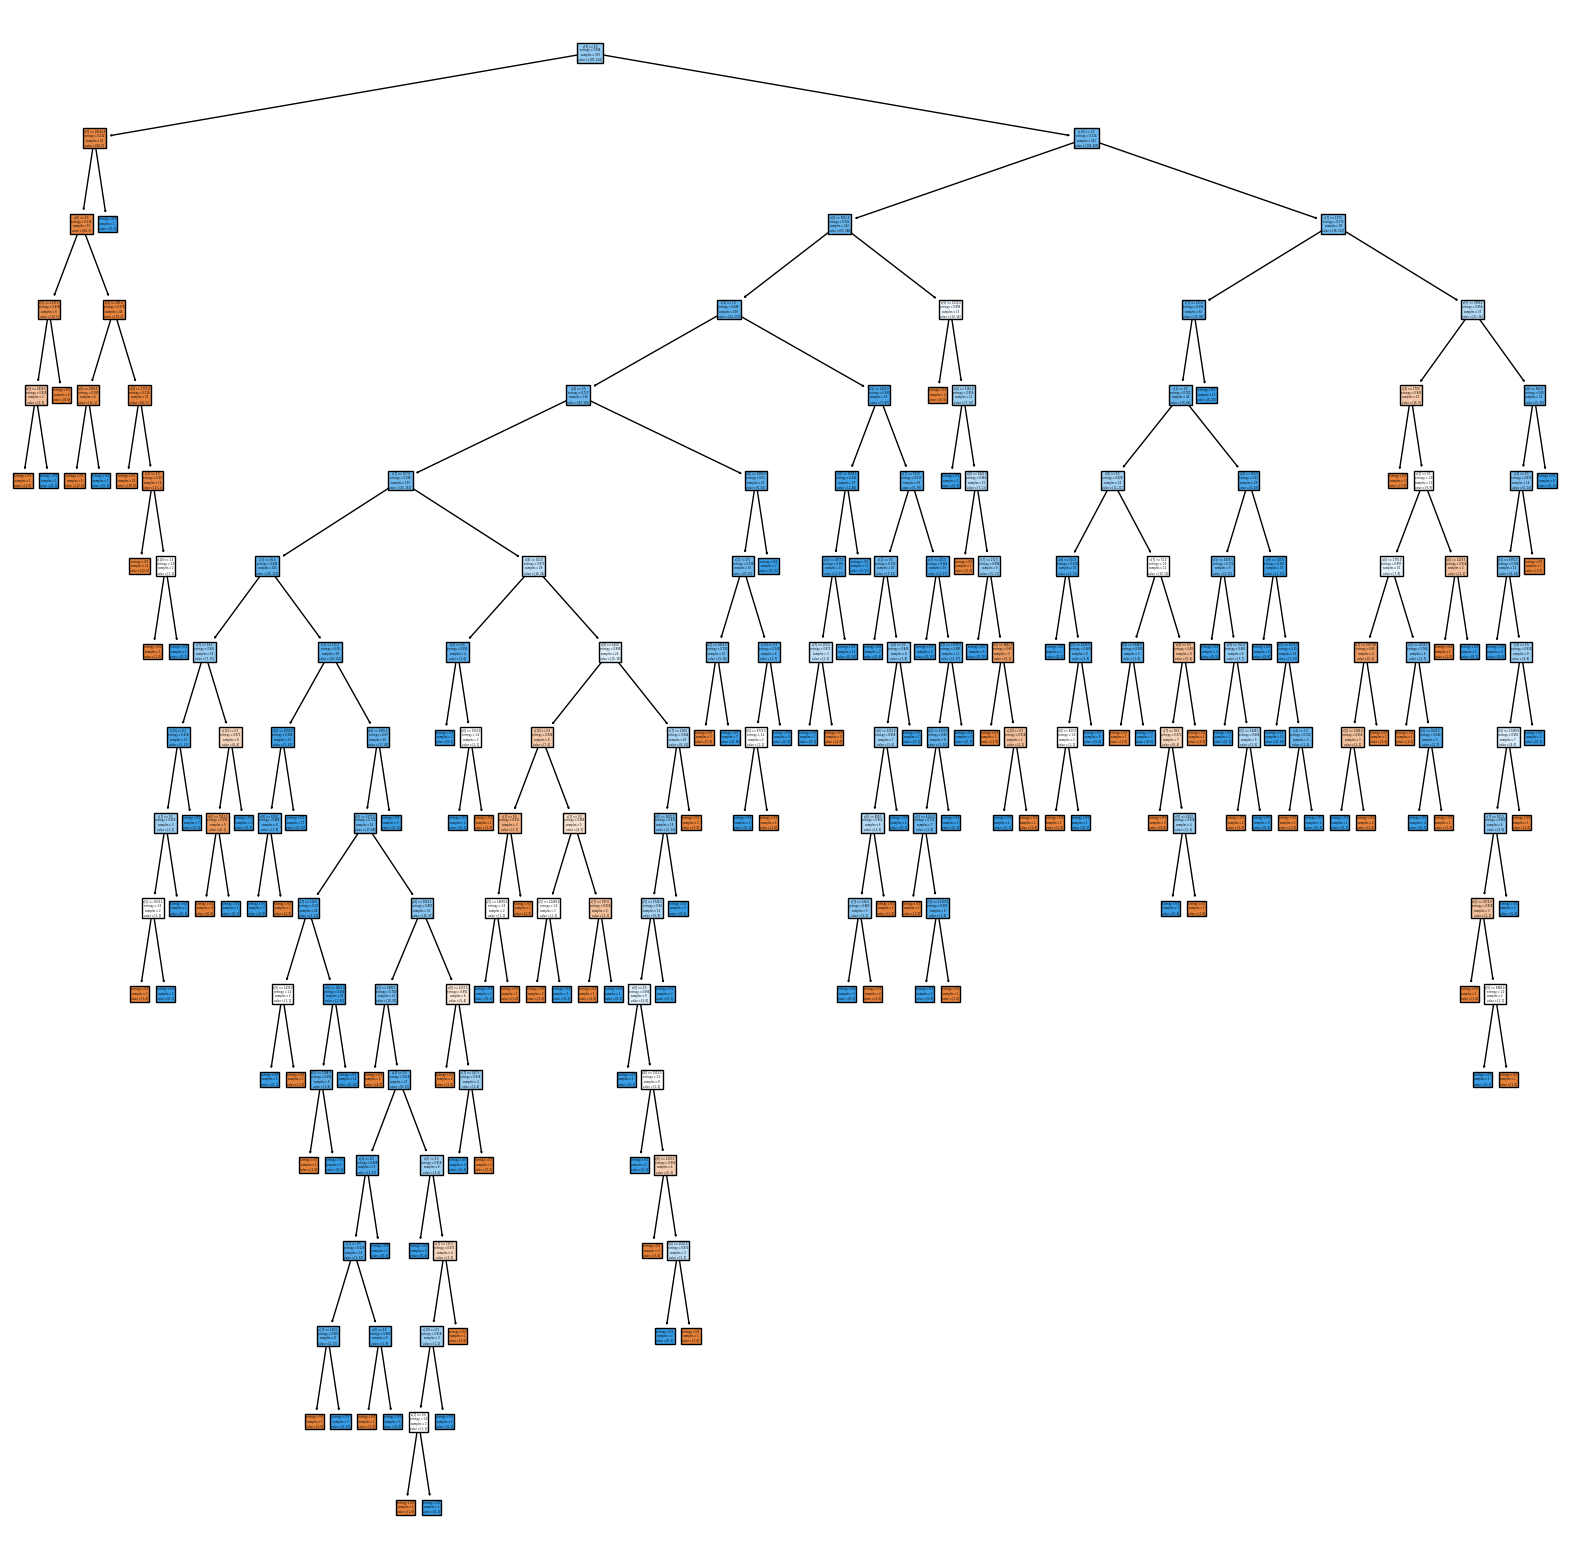

In [276]:
plt.figure(figsize = (20,20))
tree.plot_tree(rf.estimators_[1],filled = True)
plt.show()

## Logistic Regression

In [277]:
from sklearn.linear_model import LogisticRegression

In [278]:
lr= LogisticRegression()

In [279]:
lr.fit(X_TRAIN,Y_TRAIN)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [280]:
Y_pred_lr = lr.predict(X_TEST)

In [281]:
accuracy_lr= accuracy_score(Y_pred_lr,Y_TEST)
print(accuracy_lr)

0.8461538461538461


In [282]:
print("Precision : ", precision_score(Y_TEST, Y_pred_lr))
print("Recall : ", recall_score(Y_TEST, Y_pred_lr))
print("F1 Score : ", f1_score(Y_TEST, Y_pred_lr))
print("\n")

cm5=confusion_matrix(Y_pred_lr,Y_TEST)
cm5

Precision :  0.8181818181818182
Recall :  1.0
F1 Score :  0.9




array([[2, 0],
       [2, 9]])

# SVM

In [283]:
from sklearn.svm import SVC, LinearSVC

In [284]:
svm = SVC(kernel='rbf', random_state = 42)
svm.fit(X_TRAIN, Y_TRAIN)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(random_state=42)

In [285]:
Y_pred_svm = lr.predict(X_TEST)

In [286]:
accuracy_svm= accuracy_score(Y_pred_svm,Y_TEST)
print(accuracy_svm)

0.8461538461538461


In [287]:
print("Precision : ", precision_score(Y_TEST, Y_pred_svm))
print("Recall : ", recall_score(Y_TEST, Y_pred_svm))
print("F1 Score : ", f1_score(Y_TEST, Y_pred_svm))
print("\n")

cm6=confusion_matrix(Y_pred_svm,Y_TEST)
cm6

Precision :  0.8181818181818182
Recall :  1.0
F1 Score :  0.9




array([[2, 0],
       [2, 9]])

In [288]:
df = pd.DataFrame({
    'Model':['Logistic Regression', 'Decision Tree', 'KNN', 'Random Forest', 'SVM', 'Naive Bayes'],
    'Accuracy_score' :[accuracy_lr, accuracy_dt, accuracy_knn, accuracy_rf, accuracy_svm, accuracy_nb]
})

In [289]:
df

,Model,Accuracy_score
0,Logistic Regression,0.846154
1,Decision Tree,0.846154
2,KNN,0.692308
3,Random Forest,0.846154
4,SVM,0.846154
5,Naive Bayes,0.692308
